In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __How to Make a Submission?__
* __Guidelines for Final Submission__

### Step 1: Importing the Relevant Libraries

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import calendar

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [18]:
test = pd.read_csv("/content/drive/MyDrive/Jobathon/3 6 22/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Jobathon/3 6 22/train.csv")


### Step 2: Data Inspection

In [19]:
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [20]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


to separete out date month and column but it was giving low correlation value so not used.

In [15]:
#train['created_year'] = pd.to_datetime(train['created_at']).dt.year
train['created_month'] = pd.to_datetime(train['created_at']).dt.month
train['created_day'] = pd.to_datetime(train['created_at']).dt.day
train['created_war'] = pd.to_datetime(train['created_at']).dt.weekday
train['signup_month'] = pd.to_datetime(train['signup_date']).dt.month
train['signup_day'] = pd.to_datetime(train['signup_date']).dt.day
train['signup_war'] = pd.to_datetime(train['signup_date']).dt.weekday

In [21]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

### Step 3: Exploratory Data Analysis

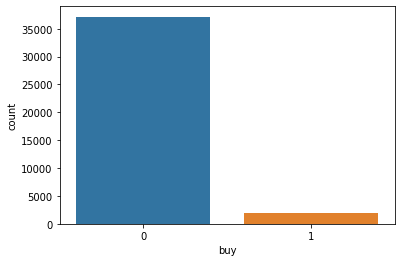

In [22]:
import seaborn as sns
sns.countplot(x='buy',data = train )

In [23]:
train.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [24]:
train.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.000000,0.143723,0.222746,-0.027862,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,0.016137,-0.035218,-0.019808,0.001002,0.025785,-0.009223,-0.020762
campaign_var_1,0.143723,1.000000,0.561489,-0.014415,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,-0.087202
campaign_var_2,0.222746,0.561489,1.000000,0.021305,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,-0.080064
products_purchased,-0.027862,-0.014415,0.021305,1.000000,-0.009479,0.011023,0.000775,0.010831,-0.007867,0.001855,0.008707,-0.005779,0.008816,0.004380,-0.003545,-0.007717,0.004140
user_activity_var_1,0.012223,0.024100,-0.032969,-0.009479,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.011023,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.000775,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.010831,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706
user_activity_var_5,-0.006575,-0.023116,-0.030990,-0.007867,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972
user_activity_var_6,0.013992,0.029665,0.067304,0.001855,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951


(17.5, -0.5)

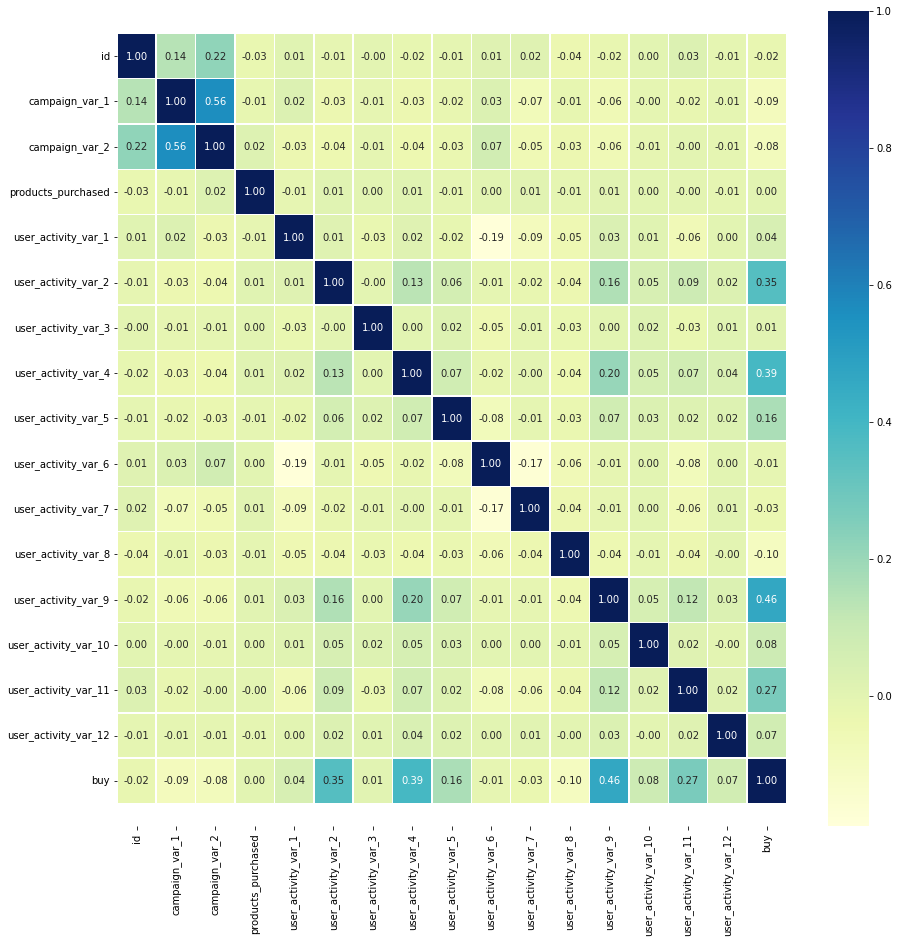

In [133]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Step 4: Data Cleaning

As signup date and product purchased have many nan values so dropped.

In [26]:
# Seperate Features and Target
X= train.drop(columns = ['id','buy','created_at','signup_date','products_purchased'], axis=1)
y= train['buy']

In [27]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [28]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Step 5: Building Model

In [29]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import xgboost as xgb

In [30]:
algos = [LogisticRegression(),
          KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestClassifier(), SVC(), XGBClassifier()]

names = ['LogisticRegression',
         'KNeighborsClassifier', 'DecisionTretClassifier','Random Forest', "SVC" ,'XGBClassifier']

rmse_list_train = []
rmse_list_test = []


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    y_pred1 = model.predict(X_valid)
    MSE= accuracy_score(y_train,y_pred)
    MSE1= accuracy_score(y_valid,y_pred1)
    rmse_list_train.append(MSE)
    rmse_list_test.append(MSE1)
evaluation = pd.DataFrame({'Model': names,
                           'RMSE _train': rmse_list_train , 'RMSE _test': rmse_list_test})

In [32]:
evaluation

,Model,RMSE _train,RMSE _test
0,LogisticRegression,0.973219,0.974212
1,KNeighborsClassifier,0.958567,0.956594
2,DecisionTretClassifier,0.980848,0.971658
3,Random Forest,0.980848,0.973829
4,SVC,0.970250,0.972041
5,XGBClassifier,0.974496,0.974978


In [44]:
final.to_csv('1.csv',index = False)

In [36]:
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
cl1 = LogisticRegression()
cl2 = RandomForestClassifier()
cl3 = SVC()
cl4 = XGBClassifier()


voting_cl = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4)])
voting_cl.fit(X, y)

VotingClassifier(estimators=[('cl1', LogisticRegression()),
                             ('cl2', RandomForestClassifier()), ('cl3', SVC()),
                             ('cl4', XGBClassifier())])

In [48]:
pos=train[train['buy']==0]
neg=train[train['buy']==1]
print(pos.shape,neg.shape)
# Seperate Features and Target
pos = pos.drop(columns = ['id','created_at','signup_date','products_purchased'], axis=1)
pos_buy = pos.drop(columns = ['buy'], axis=1)
neg = neg.drop(columns = ['id','created_at','signup_date','products_purchased'], axis=1)
neg_buy =neg.drop(columns = ['buy'], axis=1)

(37163, 19) (1998, 19)


In [105]:
X1 =pd.concat([pos_buy[:3000], neg_buy], axis=0)
Y1 =pd.concat([pos['buy'][:3000], neg['buy']], axis=0)
X2 =pd.concat([pos_buy[3000:6000], neg_buy], axis=0)
Y2 =pd.concat([pos['buy'][3000:6000], neg['buy']], axis=0)
X3 =pd.concat([pos_buy[6000:9000], neg_buy], axis=0)
Y3 =pd.concat([pos['buy'][6000:9000], neg['buy']], axis=0)
X4 =pd.concat([pos_buy[9000:12000], neg_buy], axis=0)
Y4 =pd.concat([pos['buy'][9000:12000], neg['buy']], axis=0)
X5 =pd.concat([pos_buy[12000:15163], neg_buy], axis=0)
Y5 =pd.concat([pos['buy'][12000:15163], neg['buy']], axis=0)
X6=pd.concat([pos_buy[15000:18000], neg_buy], axis=0)
Y6=pd.concat([pos['buy'][15000:18000], neg['buy']], axis=0)
X7=pd.concat([pos_buy[18000:21000], neg_buy], axis=0)
Y7=pd.concat([pos['buy'][18000:21000], neg['buy']], axis=0)
X8=pd.concat([pos_buy[21000:24000], neg_buy], axis=0)
Y8=pd.concat([pos['buy'][24000:27000], neg['buy']], axis=0)
X9=pd.concat([pos_buy[27000:34000], neg_buy], axis=0)
Y9=pd.concat([pos['buy'][27000:34000], neg['buy']], axis=0)
X10=pd.concat([pos_buy[34000:37163], neg_buy], axis=0)
Y10=pd.concat([pos['buy'][34000:37163], neg['buy']], axis=0)

In [106]:
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
cl1 = LogisticRegression()
cl2 = RandomForestClassifier()
cl3 = SVC()
cl4 = XGBClassifier()
cl5 = GradientBoostingClassifier()
cl6 = AdaBoostClassifier()
cl7 = BaggingClassifier()


voting_cl1 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl1.fit(X1, Y1)
voting_cl2 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl2.fit(X2, Y2)
voting_cl3 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl3.fit(X3, Y3)
voting_cl4 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl4.fit(X4, Y4)
voting_cl5 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl5.fit(X5, Y5)
voting_cl6 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl6.fit(X6, Y6)
voting_cl7 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl7.fit(X7, Y7)
voting_cl8 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl8.fit(X8, Y8)
voting_cl9 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl9.fit(X9, Y9)
voting_cl10 = VotingClassifier(estimators =[('cl1', cl1), ('cl2', cl2), ('cl3', cl3), ('cl4',cl4),('cl5', cl5),('cl6', cl6),('cl7',cl7)])
voting_cl10.fit(X10, Y10)

VotingClassifier(estimators=[('cl1', LogisticRegression()),
                             ('cl2', RandomForestClassifier()), ('cl3', SVC()),
                             ('cl4', XGBClassifier()),
                             ('cl5', GradientBoostingClassifier()),
                             ('cl6', AdaBoostClassifier()),
                             ('cl7', BaggingClassifier())])

In [126]:
y_pred1 = voting_cl1.predict(X_test)
y_pred2 = voting_cl2.predict(X_test)
y_pred3 = voting_cl3.predict(X_test)
y_pred4 = voting_cl4.predict(X_test)
y_pred5 = voting_cl5.predict(X_test)
y_pred6 = voting_cl6.predict(X_test)
y_pred7 = voting_cl7.predict(X_test)
y_pred8 = voting_cl8.predict(X_test)
y_pred9 = voting_cl9.predict(X_test)
y_pred10 = voting_cl10.predict(X_test)
#test['buy']=y_pred
dict1 = {'id':test['id'], 'buy1' : y_pred1, 'buy2' : y_pred2,'buy3' : y_pred3,'buy4' : y_pred4,'buy5' : y_pred5,'buy6' : y_pred6,'buy7' : y_pred7,'buy8' : y_pred8,'buy9' : y_pred9,'buy10' : y_pred10}
final=pd.DataFrame(dict1)
final.head()

,id,buy1,buy2,buy3,buy4,buy5,buy6,buy7,buy8,buy9,buy10
0,39162,1,1,1,1,1,1,1,1,1,1
1,39163,0,0,0,0,0,0,0,0,0,0
2,39164,0,0,0,0,0,0,0,0,0,0
3,39165,1,1,1,1,1,1,1,1,1,1
4,39166,0,0,0,0,0,0,0,0,0,0


In [127]:
final['buy']= final['buy1'] + final['buy2'] + final['buy3'] + final['buy4']+final['buy5'] + final['buy6'] + final['buy7'] + final['buy8']+ final['buy9'] + final['buy10']
final.head()

,id,buy1,buy2,buy3,buy4,buy5,buy6,buy7,buy8,buy9,buy10,buy
0,39162,1,1,1,1,1,1,1,1,1,1,10
1,39163,0,0,0,0,0,0,0,0,0,0,0
2,39164,0,0,0,0,0,0,0,0,0,0,0
3,39165,1,1,1,1,1,1,1,1,1,1,10
4,39166,0,0,0,0,0,0,0,0,0,0,0


In [128]:
final['buy'].value_counts()

0     11134
1       674
10      541
2       189
9       165
3       108
5       100
4        86
6        66
7        64
8        57
Name: buy, dtype: int64

In [129]:
def inc(x):
  if x > 9:
    return 1
  else:
    return 0
final['buy'] = final['buy'].apply(inc)
final.head()

,id,buy1,buy2,buy3,buy4,buy5,buy6,buy7,buy8,buy9,buy10,buy
0,39162,1,1,1,1,1,1,1,1,1,1,1
1,39163,0,0,0,0,0,0,0,0,0,0,0
2,39164,0,0,0,0,0,0,0,0,0,0,0
3,39165,1,1,1,1,1,1,1,1,1,1,1
4,39166,0,0,0,0,0,0,0,0,0,0,0


In [130]:
final=final.drop(columns = [ 'buy1', 'buy2', 'buy3', 'buy4', 'buy5', 'buy6', 'buy7', 'buy8',
       'buy9', 'buy10'], axis=1)
final.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [131]:
final.columns

Index(['id', 'buy'], dtype='object')

In [132]:
final.to_csv('8.csv',index = False)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
n_estimators = [200,300,400]
max_features = ['auto', 'sqrt']
max_depth = [10, 12 ,15 ,18]

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42,n_jobs=-1)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_valid, y_valid, train=True)
print_score(rf_clf, X_train, y_train, X_valid, y_valid, train=False)

In [99]:
from sklearn.ensemble import BaggingClassifier
cl2 = RandomForestClassifier(n_estimators=200,max_depth=18)
cl3 = BaggingClassifier()
cl3.fit(X_train,y_train)

BaggingClassifier()

In [84]:

test= pd.read_csv("/content/drive/MyDrive/Jobathon/3 6 22/test.csv")

test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [85]:
X_test= test.drop(columns = ['id','created_at','signup_date','products_purchased'], axis=1)
y_pred = svc_clf.predict(X_test)
test['buy']=y_pred
dict1 = {'id':test['id'], 'buy' : y_pred }
final=pd.DataFrame(dict1)
final.head()


,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,0
4,39166,0


In [86]:
final.to_csv('4.csv',index = False)